# Introdução

Este arquivo se refere aos dados obtidos pela turma de Química Geral I do curso de Processos
Químicos do IFRJ _campus_ Rio de Janeiro, no 2º semestre de 2018, em uma prática de laboratório cujo objetivo era ensinar
aos alunos como ler o volume escoado de um dado líquido em buretas e analisar os resultados da turma como um todo, entendendo os motivos que levam a ter leituras distintas.

Ao se repetir várias vezes uma medição são encontrados vários resultados diferentes,
embora alguns possam coincidir. Ou seja, ao medir várias vezes a mesma grandeza, usando
o mesmo instrumento e o mesmo observador é possı́vel que as medidas encontradas sejam
diferentes. A isto se chama *dispersão* das medidas.

No caso em questão, foram realizadas diversas medidas por diferentes pessoas. As medidas
foram de volume escoado em buretas. O líquido da primeira bureta era água e o da segunda
era uma solução de permanganato de potássio, que possui uma coloração roxa intensa.

O objetivo é demonstrar que, realizando muitas medidas, boa parte irá se concentrar ao redor
de uma faixa de valores. Eventualmente, podem surgir valores discrepantes (*outliers*) que
podem ser devido a erros de leitura. A forma correta de ler uma escala em uma vidraria 
como a bureta é manter a escala na altura dos olhos. Em soluções aquosas, a leitura do volume
é feita pela parte de baixo do menisco formado pelo líquido. No entanto, quando o líquido
é muito escuro, como no caso da solução de permanganto, a visualização do menisco fica dificultada.

O erro devido a uma leitura feita acima ou abaixo da linha do menisco do líquido é chamado de
**erro de paralaxe** e é exemplificado na figura abaixo. Esse erro é uma possível fonte de
*outliers* por ser um erro grosseiro.

<img src='images/parallax.png' width=200 height=200>

A dispersão nos valores, desconsiderando erros grosseiros, podem ter diversas origens.
Como as medidas são feitas por pessoas distintas, a própria acuidade visual da pessoa
pode afetar, além de efeitos de iluminação do local, reflexos no caso de usuários de óculos,
dentre diversos outros fatores.

Tópicos que podem ser discutidos com base nesse experimento:

- conceitos de *precisão* e *exatidão*
- conceitos de *repetibilidade* e *reprodutibilidade*
- tipos de erros (grosseiros, sistemáticos, randômicos)
- conceitos básicos de estatística (dispersão, média, mediana, algarismos significativos)
- construção e interpretação de histogramas e boxplots
    - influência da largura de classes (*bins*) na interpretação de um histograma

# Setup

Importe as seguintes bibliotecas para que os exemplos e tratamentos dos dados do notebook funcionem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A biblioteca a seguir foi criada especialmente para esse trabalho, permitindo uma rápida análise dos dados e geração de gráficos.

In [2]:
import statistics

# Importação dos dados

Vamos importar os valores lidos pelos alunos, que estão salvos em uma planilha em formato csv.

In [3]:
df = pd.read_csv('dados_brutos/volumes2018_2.csv')
df.head()

,agua / mL,KMnO4 / mL
0,16.00,22.50
1,16.10,22.40
2,16.00,22.50
3,16.12,22.41
4,16.16,22.38


Breve detalhamento dos dados com o método `describe` do `pandas`.

In [4]:
desc_table = df.describe()
desc_table

,agua / mL,KMnO4 / mL
count,18.000000,18.000000
mean,16.054444,22.411111
std,0.064281,0.038789
min,15.980000,22.350000
25%,16.000000,22.392500
50%,16.025000,22.400000
75%,16.100000,22.417500
max,16.180000,22.500000


## Tabela com IQR

Vamos criar uma linha para o intervalo interquartil (*interquartile range* - IQR em inglês) na tabela de descrição de dados. O IQR é o intervalo onde se concentra parte significativa dos dados e sua largura dá uma indicação da dispersão desses valores centrais.

In [5]:
desc_table.loc['IQR'] = desc_table.loc['75%'] - desc_table.loc['25%']
desc_table

,agua / mL,KMnO4 / mL
count,18.000000,18.000000
mean,16.054444,22.411111
std,0.064281,0.038789
min,15.980000,22.350000
25%,16.000000,22.392500
50%,16.025000,22.400000
75%,16.100000,22.417500
max,16.180000,22.500000
IQR,0.100000,0.025000


Há um maior *range* de valores para as leituras de água, talvez *bins* mais largos no histograma sejam melhores para visualizar. Isso será testado a seguir.

## Tabelas de frequências

Vamos criar tabelas de fequências para ter uma ideia melhor de qual a largura de _bins_ mais adequada para cada histograma.

### Água

Vamos obter os valores mínimos e máximos de leitura.

In [6]:
min_water = df['agua / mL'].min()
max_water = df['agua / mL'].max()

Testando intervalo de *bins* de 0.05

In [7]:
bins_tab = statistics.freq_table(df['agua / mL'], min_water, max_water + 0.01, 0.05)
bins_tab

,Count,Count / %,Cumulative count,Cumulative count / %
Bins,,,,
"[15.98, 16.03)",9,50.00,9,50.00
"[16.03, 16.08)",1,5.56,10,55.56
"[16.08, 16.13)",6,33.33,16,88.89
"[16.13, 16.18)",2,11.11,18,100.00


O ideal é que a escala de _bis_, nesse caso, seja de múltiplos de 5, para facilitar a leitrua e o entendimento. Modificando os valores de início e de fim:

In [8]:
bins_tab = statistics.freq_table(df['agua / mL'], min_water - 0.03, max_water + 0.03, 0.05)
bins_tab

,Count,Count / %,Cumulative count,Cumulative count / %
Bins,,,,
"[15.95, 16.0)",1,5.56,1,5.56
"[16.0, 16.05)",8,44.44,9,50.00
"[16.05, 16.1)",3,16.67,12,66.67
"[16.1, 16.15)",4,22.22,16,88.89
"[16.15, 16.2)",2,11.11,18,100.00


Testando intervalo de *bins* de 0.02

In [9]:
bins_tab = statistics.freq_table(df['agua / mL'], min_water, max_water + 0.03, 0.02)
bins_tab

,Count,Count / %,Cumulative count,Cumulative count / %
Bins,,,,
"[15.98, 16.0)",1,5.56,1,5.56
"[16.0, 16.02)",8,44.44,9,50.00
"[16.02, 16.04)",0,0.00,9,50.00
"[16.04, 16.06)",1,5.56,10,55.56
"[16.06, 16.08)",0,0.00,10,55.56
"[16.08, 16.1)",2,11.11,12,66.67
"[16.1, 16.12)",3,16.67,15,83.34
"[16.12, 16.14)",1,5.56,16,88.90
"[16.14, 16.16)",0,0.00,16,88.90


Um intervalo de _bins_ menor permite um maior detalhamento dos dados, mas talvez não gere um histograma que seja adequado para visualização pois há intervalos sem dados. Mais abaixo serão construídos os dois histogramas.

Mais detalhes sobre _bins_ e suas larguras podem ser lidos [aqui](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width).

### $KMnO_4$

Vamos obter os valores mínimos e máximos de leitura.

In [10]:
min_perm = df['KMnO4 / mL'].min()
max_perm = df['KMnO4 / mL'].max()

Testando intervalo de *bins* de 0.02

In [11]:
bins_tab = statistics.freq_table(df['KMnO4 / mL'], min_perm, max_perm + 0.01, 0.02)
bins_tab

,Count,Count / %,Cumulative count,Cumulative count / %
Bins,,,,
"[22.35, 22.37)",1,5.56,1,5.56
"[22.37, 22.39)",3,16.67,4,22.23
"[22.39, 22.41)",7,38.89,11,61.12
"[22.41, 22.43)",3,16.67,14,77.79
"[22.43, 22.45)",1,5.56,15,83.35
"[22.45, 22.47)",1,5.56,16,88.91
"[22.47, 22.49)",0,0.00,16,88.91
"[22.49, 22.51)",2,11.11,18,100.02


O ideal é que a escala, nesse caso, seja de múltiplos de 2, para facilitar o entendimento. Modificando os valores de início e de fim:

In [12]:
bins_tab = statistics.freq_table(df['KMnO4 / mL'], min_perm - 0.01, max_perm + 0.03, 0.02)
bins_tab

,Count,Count / %,Cumulative count,Cumulative count / %
Bins,,,,
"[22.34, 22.36)",1,5.56,1,5.56
"[22.36, 22.38)",0,0.00,1,5.56
"[22.38, 22.4)",4,22.22,5,27.78
"[22.4, 22.42)",8,44.44,13,72.22
"[22.42, 22.44)",2,11.11,15,83.33
"[22.44, 22.46)",1,5.56,16,88.89
"[22.46, 22.48)",0,0.00,16,88.89
"[22.48, 22.5)",0,0.00,16,88.89
"[22.5, 22.52)",2,11.11,18,100.00


Testando intervalo de *bins* de 0.05

In [13]:
bins_tab = statistics.freq_table(df['KMnO4 / mL'], min_perm, max_perm + 0.01, 0.05)
bins_tab

,Count,Count / %,Cumulative count,Cumulative count / %
Bins,,,,
"[22.35, 22.4)",11,61.11,11,61.11
"[22.4, 22.45)",5,27.78,16,88.89
"[22.45, 22.5)",2,11.11,18,100.00


Repare que com intervalo de 0.05 os dados estão muito agrupados em apenas três intervalos, não dando uma real dimensão da dispersão de valores.

# Plots

Para os gráficos, inicialmente criamos uma figura com dois sistemas de eixo, um acima do outro e compartilhando o mesmo eixo horizontal. Assim, passamos esses eixos para a função de histograma e de boxplot e os gráficos irão compartilhar os mesmos valores e serão apresentados um acima do outro.

## Água

Testando com intervalo de bins 0.05.

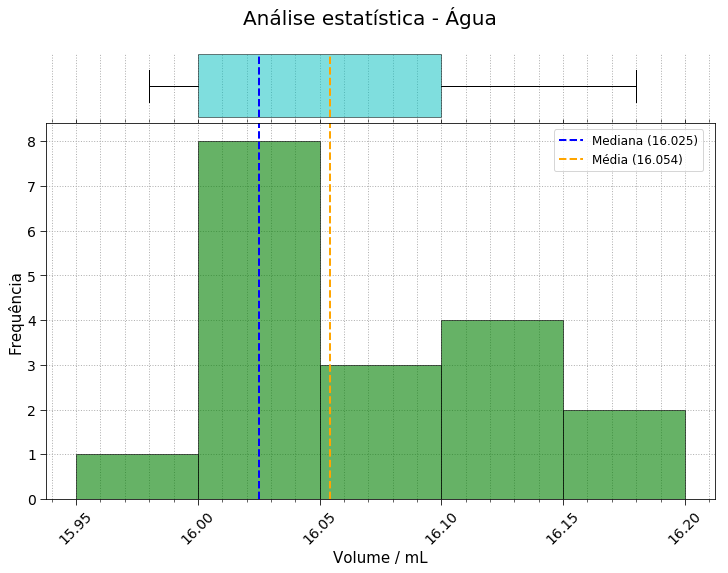

In [14]:
fig1, (ax2, ax1) = plt.subplots(figsize=(12, 8),
                                nrows=2,
                                sharex=True,
                                facecolor=(1, 1, 1),
                                gridspec_kw={
                                    "height_ratios": (.15, .85),
                                    'hspace': 0.02
                                })

statistics.plot_hist(df['agua / mL'], min_water - 0.03, max_water + 0.03, 0.05, ax=ax1)
statistics.plot_boxplot(df['agua / mL'], ax=ax2)

fig1.subplots_adjust(top=0.90)
fig1.suptitle('Análise estatística - Água', fontsize=20)

plt.show()

Testando com intervalos de bins 0.02

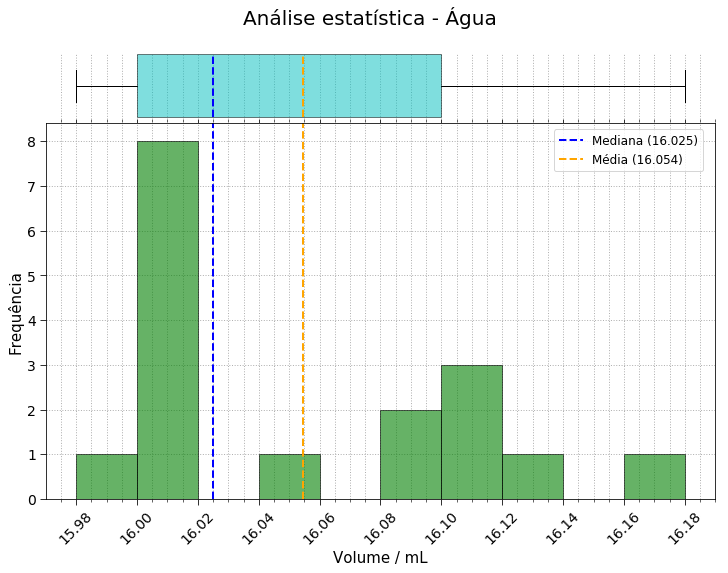

In [15]:
fig2, (ax2, ax1) = plt.subplots(figsize=(12, 8),
                                nrows=2,
                                sharex=True,
                                facecolor=(1, 1, 1),
                                gridspec_kw={
                                    "height_ratios": (.15, .85),
                                    'hspace': 0.02
                                })

statistics.plot_hist(df['agua / mL'], min_water, max_water + 0.01, 0.02, ax=ax1)
statistics.plot_boxplot(df['agua / mL'], ax=ax2)

fig2.subplots_adjust(top=0.90)
fig2.suptitle('Análise estatística - Água', fontsize=20)

plt.show()

Os histogramas ficam bem distintos, e podemos aproveitar e discutir o efeito da escolha do intervalo de *bins* na interpretação dos dados.

Muito embora um menor intervalo permita analisar mais detalhadamente os dados, ele pode dar uma falsa sensação de descontinuidade. No histograma com menor intervalo, percebemos que os dados se concentram no intervalo de entre 16.00 e 16.02, o que não é possível de perceber no de maior intervalo. No entanto, o de maior intervalo apresenta continuidade entre os _bins_ contribuindo para a visualização de que se trata de uma distribuição.

Por fim, o de menor intervalo serve também para mostrar que indicadores não necessariamente são valores que realmente foram medidos. Repare que a mediana se encontra numa região onde não foram obtidos valores por medida.

## $KMnO_4$

Testando com intervalo de bins de 0.02

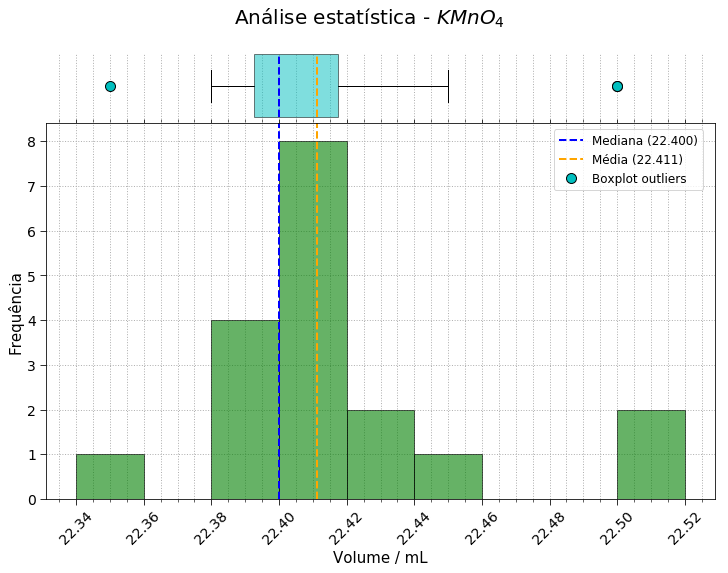

In [16]:
fig3, (ax2, ax1) = plt.subplots(figsize=(12, 8),
                                nrows=2,
                                sharex=True,
                                facecolor=(1, 1, 1),
                                gridspec_kw={
                                    "height_ratios": (.15, .85),
                                    'hspace': 0.02
                                })

statistics.plot_hist(df['KMnO4 / mL'], min_perm - 0.01, max_perm + 0.03, 0.02, ax=ax1, outlier=True)
statistics.plot_boxplot(df['KMnO4 / mL'], ax=ax2)

fig3.subplots_adjust(top=0.90)
fig3.suptitle('Análise estatística - $KMnO_4$', fontsize=20)

plt.show()

Testando com intervalo de bins de 0.05.

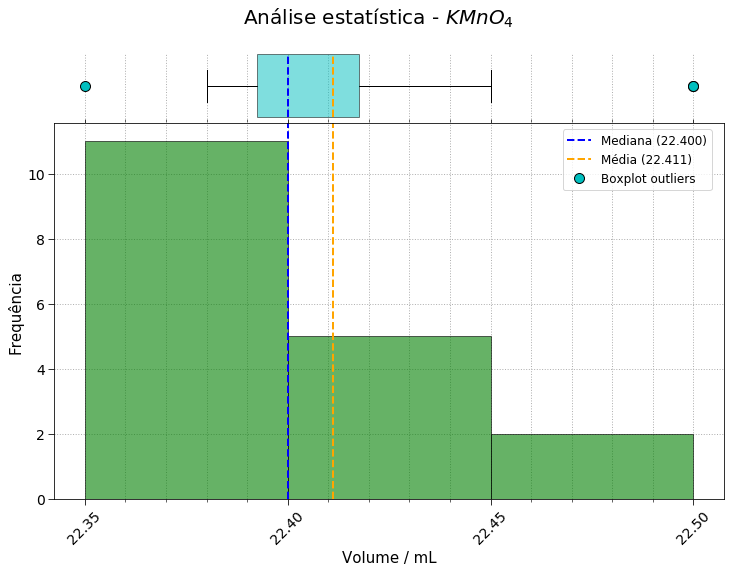

In [17]:
fig4, (ax2, ax1) = plt.subplots(figsize=(12, 8),
                                nrows=2,
                                sharex=True,
                                facecolor=(1, 1, 1),
                                gridspec_kw={
                                    "height_ratios": (.15, .85),
                                    'hspace': 0.02
                                })

statistics.plot_hist(df['KMnO4 / mL'], min_perm, max_perm + 0.03, 0.05, ax=ax1, outlier=True)
statistics.plot_boxplot(df['KMnO4 / mL'], ax=ax2)

fig4.subplots_adjust(top=0.90)
fig4.suptitle('Análise estatística - $KMnO_4$', fontsize=20)

plt.show()

Mais uma vez, há grande diferença entre os gráficos por uma mudança no intervalo de bins. Repare que o histograma com intervalores maiores não fornece muitas informações sobre onde se encontra o intervalo com mais leituras e mesmo sobre os _outliers_. Aqui, claramente o histograma com menor intervalo é mais adequado, mostrando a continuidade de valores dentro dos intervalo do boxplot e a ausência de valores até os _outliers_.

# Informação sobre as versões dos packages

In [18]:
%load_ext version_information
%version_information pandas, numpy, matplotlib

Software versions
Python 3.7.3 64bit [GCC 7.3.0]
IPython 7.4.0
OS Linux 5.0.0 32 generic x86_64 with debian buster sid
pandas 0.24.2
numpy 1.16.2
matplotlib 3.0.3
Thu Jan 16 13:26:57 2020 -03